Informática - 1º de Física - UMU
<br>
**Computación Científica**
<br>
*A.Ruiz, J. Abellán*

<p style="color:#808080"> <small><small>
 17/11/2017
</small></small></p>

## Caos determinista

En este notebook se reproducen los experimentos descritos en el artículo *Simple mathematical models with very complicated dynamics* ([Robert May, 1976](http://abel.harvard.edu/archive/118r_spring_05/docs/may.pdf)).

### Visualización

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.linspace(0,1,1000)

def f(l,x):
    return l*x*(1-x)


def iterada(n,f):
    def g(l,x):
        z = x
        for k in range(n):
            z = f(l,z)
        return z
    return g

In [3]:
def fun(lam=3,steps=30,niter=1,x0=0.2):
    plt.figure(figsize=(8,8))
    #x0 = 1-1/lam + 0.001
    g = iterada(niter,f)
    plt.plot(X,g(lam,X))
    plt.plot(X,X,color='gray',ls='dashed');
    x  = [x0]
    xp = [x0]
    yp = [0]
    nx = x0
    for k in range(steps):
        nx = g(lam,nx)
        x  += [nx]
        xp += [xp[-1],nx]          # añadimos dos tramos, uno  vertical hacia la función
        yp += [nx,nx]              # y otro horizontal hacia la bisectriz 
    plt.plot(xp,yp,color='red',lw=0.5)
    plt.plot(x,np.zeros(len(x)),'.',color='blue',alpha=0.15, markerSize=15)
    #plt.title(str(nx))

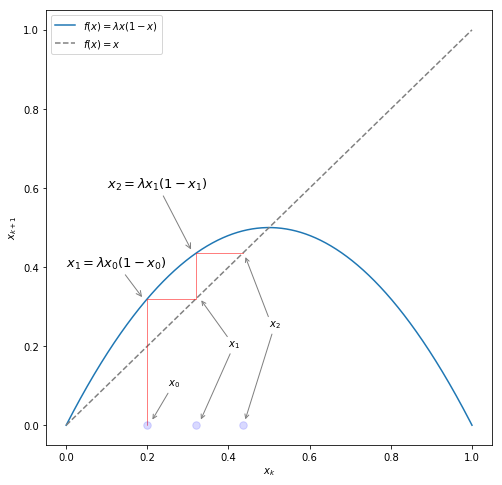

In [4]:
fun(2,2,1,0.2)

arrow = arrowprops=dict(color='gray',arrowstyle="->", connectionstyle="arc3")

plt.annotate('$x_0$', xy=(0.21,0.01), xytext=(0.25,0.1), arrowprops=arrow);
plt.annotate('$x_1=\lambda x_0 (1-x_0)$', xy=(0.19,0.32), xytext=(0.0,0.4), arrowprops=arrow, fontsize=13);
plt.annotate('$x_1$', xy=(0.33,0.01), xytext=(0.4,0.2), arrowprops=arrow);
plt.annotate('', xy=(0.33,0.32), xytext=(0.4,0.22), arrowprops=arrow);
plt.annotate('$x_2$', xy=(0.44,0.01), xytext=(0.5,0.25), arrowprops=arrow);
plt.annotate('', xy=(0.44,0.43), xytext=(0.5,0.27), arrowprops=arrow);
plt.annotate('$x_2=\lambda x_1 (1-x_1)$', xy=(0.31,0.44), xytext=(0.1,0.6), arrowprops=arrow,fontsize=13);
plt.legend(["$f(x)=\lambda x (1-x)$",'$f(x)=x$']); plt.xlabel('$x_k$'); plt.ylabel('$x_{k+1}$');

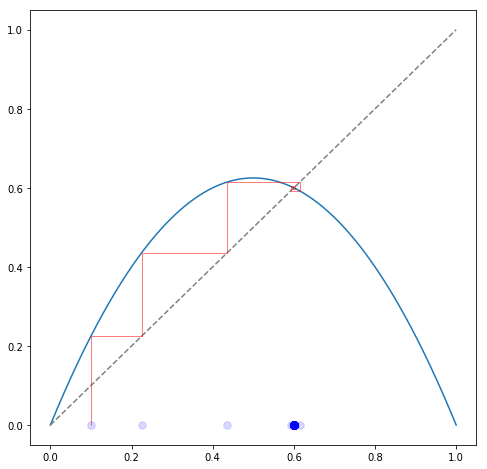

In [5]:
fun(2.5,100,x0=0.1)

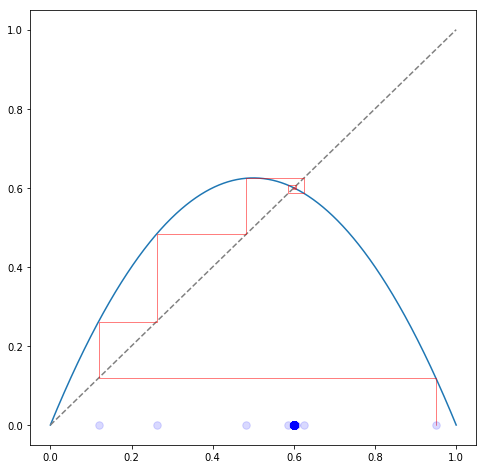

In [6]:
fun(2.5,100,x0=0.95)

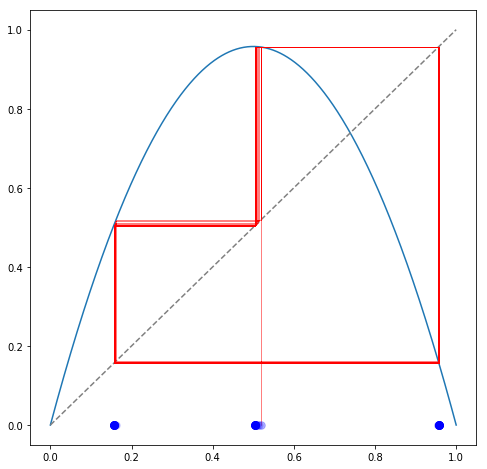

In [7]:
fun(3.83,100,x0=0.52)

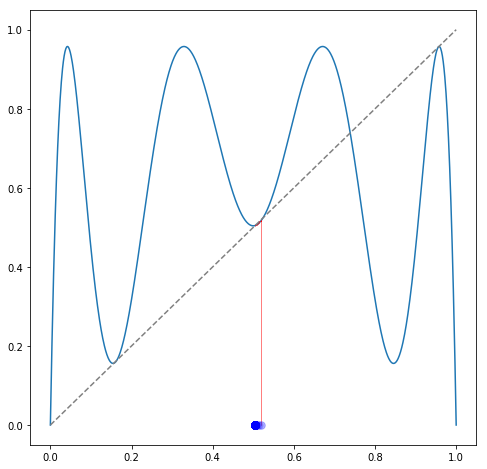

In [8]:
fun(3.83,100,3,0.52)

### Visualización interactiva

In [9]:
from ipywidgets import interact

@interact(lam=(2.,4,0.01),steps=(0,30),niter=(1,16),x0=(0.,1,0.01))
def ifun(lam=3,steps=30,niter=1,x0=0.2):
    fun(lam,steps,niter,x0)
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='lam', max=4.0, min=2.0, step=0.01), IntSlider(value=…

### Diagrama de bifurcación

In [10]:
import itertools as it

In [11]:
def mkSec(lam,x0=0.5):
    x = x0
    while True:
        x = f(lam,x)
        yield x

In [12]:
list(it.islice(mkSec(3.5,0.1),30))

[0.31500000000000006,
 0.7552125000000001,
 0.6470330294531249,
 0.7993345088744278,
 0.5613959812891678,
 0.8618068671853906,
 0.416835268001226,
 0.8507926957305024,
 0.444305696177445,
 0.8641435058260233,
 0.41089827507656534,
 0.8472130891548401,
 0.4530507475184358,
 0.8672851869199782,
 0.40285557014204826,
 0.8419703591165073,
 0.4656969572000446,
 0.8708815543913254,
 0.39356405414296014,
 0.8353498630033106,
 0.48139164284281283,
 0.8737880516536869,
 0.38598872354329244,
 0.8295050009424927,
 0.49499259023860764,
 0.8749122404661853,
 0.3830428418201883,
 0.8271235810267586,
 0.5004655695768039,
 0.874999241357392]

In [13]:
def limit(lam,x0=0.5,tot=1000, n=100):
    sec = it.islice(mkSec(lam),tot,tot+n)
    return np.array(list(sec))

In [14]:
limit(3.5,0.5).reshape(-1,4)

array([[0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968, 0.82694071, 0.50088421],
       [0.87499726, 0.38281968,

In [15]:
def limit(lam,x0=0.5,tot=10000, n=200):
    sec = it.islice(mkSec(lam),tot,tot+n)
    return set(sec)

In [16]:
def g(l): return 100

def bifurcación(l1,l2):
    lams = np.linspace(l1,l2,200)
    for l in lams:
        y = list(limit(l,n=g(l)))
        #print(y)
        x = l*np.ones(len(y))
        plt.plot(x,y,'.',color='red',markerSize=1)

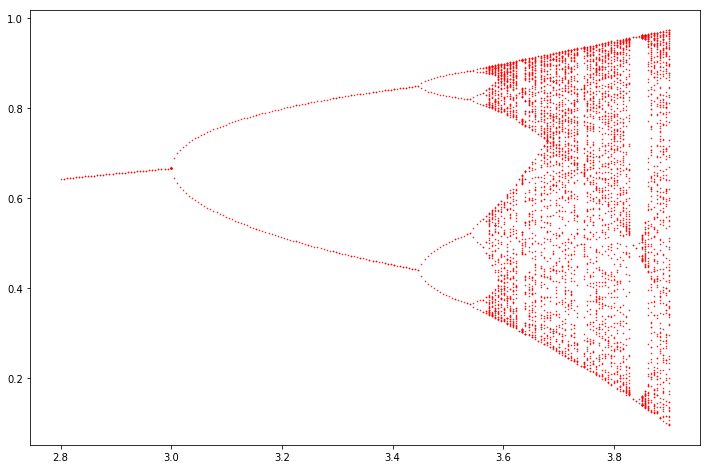

In [17]:
plt.figure(figsize=(12,8))
bifurcación(2.8,3.9)

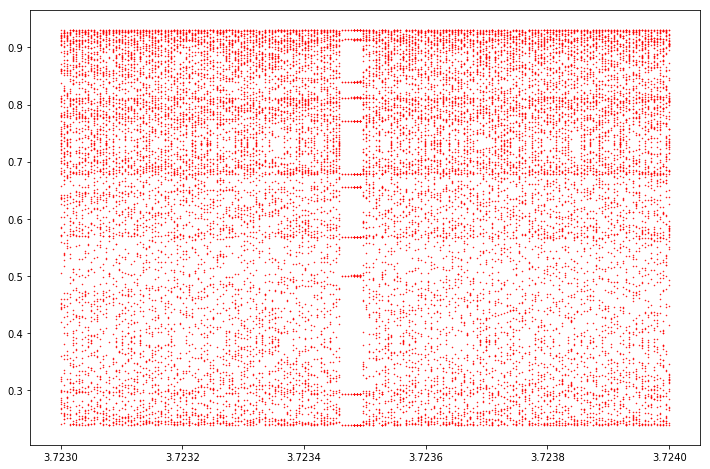

In [18]:
plt.figure(figsize=(12,8))
bifurcación(3.723,3.724)

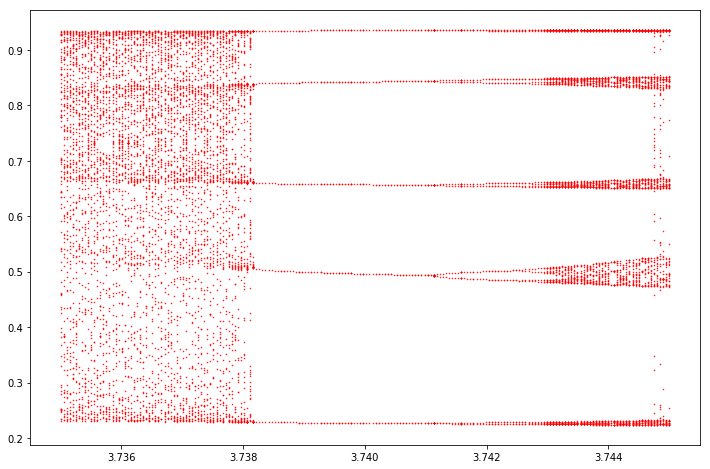

In [19]:
plt.figure(figsize=(12,8))
bifurcación(3.735,3.745)

### Exponente de Lyapunov

In [20]:
def f(l,x):
    return l*x*(1-x)

def deriv(l,x):
    return l*(1-2*x)

def mkSecxd(lam,x0=0.5):
    x = x0
    while True:
        nx = f(lam,x)
        d  = deriv(lam,nx)
        yield (nx,d)

def lyapunov(lam,x0=0.5, n=1000):
    sec = it.islice(mkSecxd(lam),n)
    l = [np.log(abs(d)) for _,d in sec]
    r = np.mean(l)
    return r

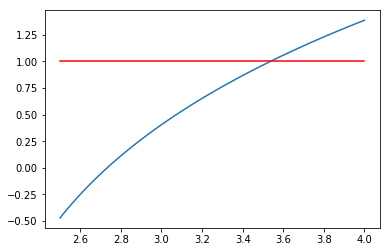

In [21]:
lam = np.linspace(2.5,4,100)
plt.plot(lam,[lyapunov(l,0.2) for l in lam])
plt.plot([lam[0],lam[-1]],[1,1],color='red');

### Aleatoriedad *vs* caos

In [22]:
def exper(x):
    plt.figure(figsize=(12,12))
    plt.subplot(2,2,1)
    plt.plot(x,'.')
    plt.xlabel('$k$')
    plt.ylabel('$x_k$')
    plt.subplot(2,2,3)
    plt.plot(x[:-1],x[1:],'.');
    plt.xlabel('$x_k$')
    plt.ylabel('$x_{k+1}$')
    plt.axis('equal');
    plt.subplot(2,2,2)
    plt.hist(x,orientation='horizontal');

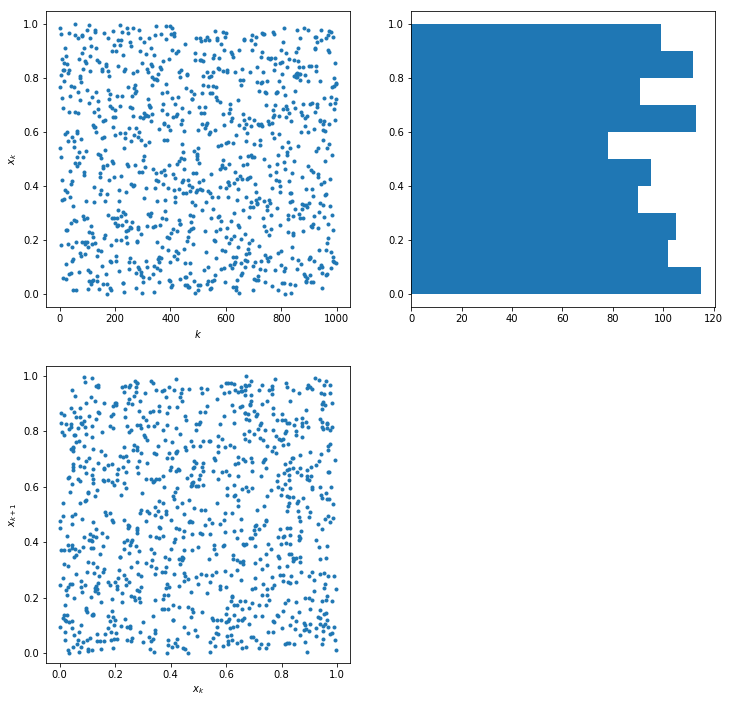

In [23]:
r = np.random.rand(1000)

exper(r)

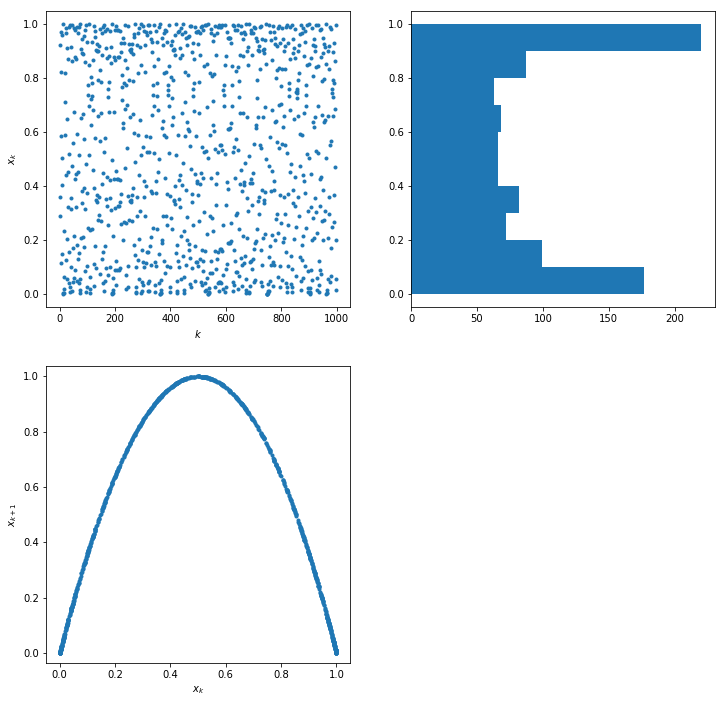

In [24]:
s = np.array(list(it.islice(mkSec(4,0.1),1000)))

exper(s)

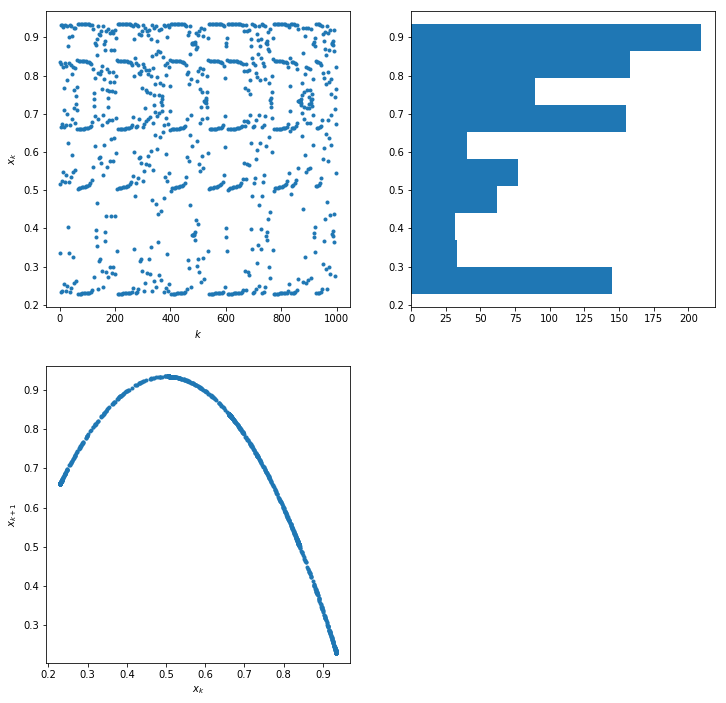

In [25]:
s = np.array(list(it.islice(mkSec(3.738,0.1),1000)))

exper(s)

### Solución analítica

Mediante un enfoque combinado de cálculo simbólico y numérico.

In [26]:
import numpy as np
from sympy import *
from sympy.abc import alpha, beta, gamma, delta, epsilon

init_printing(pretty_print=True)

from IPython.display import display

In [27]:
lamda,x = symbols(['lambda','x'])

In [28]:
def f(x): return lamda * x * (1-x)

def iterada(n,f):
    def g(x):
        z = x
        for k in range(n):
            z = f(z)
        return z
    return g

In [29]:
(f(f(x))-x).expand()

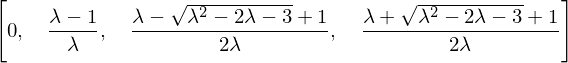

In [30]:
solve(Eq(x, f(f(x)).expand()),x)

In [31]:
import scipy

def cortes(it,l,verbose=False):
    h = iterada(it,f)(x)
    if verbose:
        display(h)
    fun = poly(h.subs(lamda,l),x)
    der = diff(fun,x)
    g = fun-x
    sols = scipy.roots(g.coeffs())
    r = [(v.real, der.subs(x,v.real)) for v in sols if abs(v.imag) < 1E-6]
    return r

In [32]:
cortes(3,3.8,verbose=True)

In [33]:
cortes(8,3.7)